In [1]:
### If Google Colab
!git config --global user.email "sjs.shamsi@gmail.com"
!git config --global user.name "SJShamsi"

from google.colab import drive
drive.mount('/content/drive')

Thesis_Files = '/content/drive/MyDrive/Thesis_Files/'

Mounted at /content/drive


In [2]:
### Importing common items
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from fastai.vision.all import *
from fastai.callback.tracker import SaveModelCallback

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams['axes.grid'] = False

In [3]:
# dmdt_by_Name_Band_50x50 = '/home/shoaib/Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50.pkl'
dmdt_by_Name_Band_file = Thesis_Files + 'Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50_equivalent_bins.pkl'

dm_bins = np.load(Thesis_Files + 'Thesis/dmdt_Analysis/Best_Bins/equivalent_bins_50x50_QSOs/QSO_dm_bins.npy')
dt_bins = np.load(Thesis_Files + 'Thesis/dmdt_Analysis/Best_Bins/equivalent_bins_50x50_QSOs/QSO_dt_bins.npy')

def numpy_to_pil(numpy_array):
    numpy_array = (numpy_array - numpy_array[:, :, :-1].min()) / (numpy_array[:, :, :-1].max() - numpy_array[:, :, :-1].min())
    numpy_array[:, :, 2] = np.zeros_like(numpy_array[:, :, 2])
    return PILImage.create(Image.fromarray((numpy_array * 255).astype(np.uint8)))

def norm(numpy_array):
    numpy_array = (numpy_array - numpy_array[:, :, :-1].min()) / (numpy_array[:, :, :-1].max() - numpy_array[:, :, :-1].min())
    numpy_array[:, :, 2] = np.zeros_like(numpy_array[:, :, 2])
    return numpy_array

Let's understand our distribution a little better.

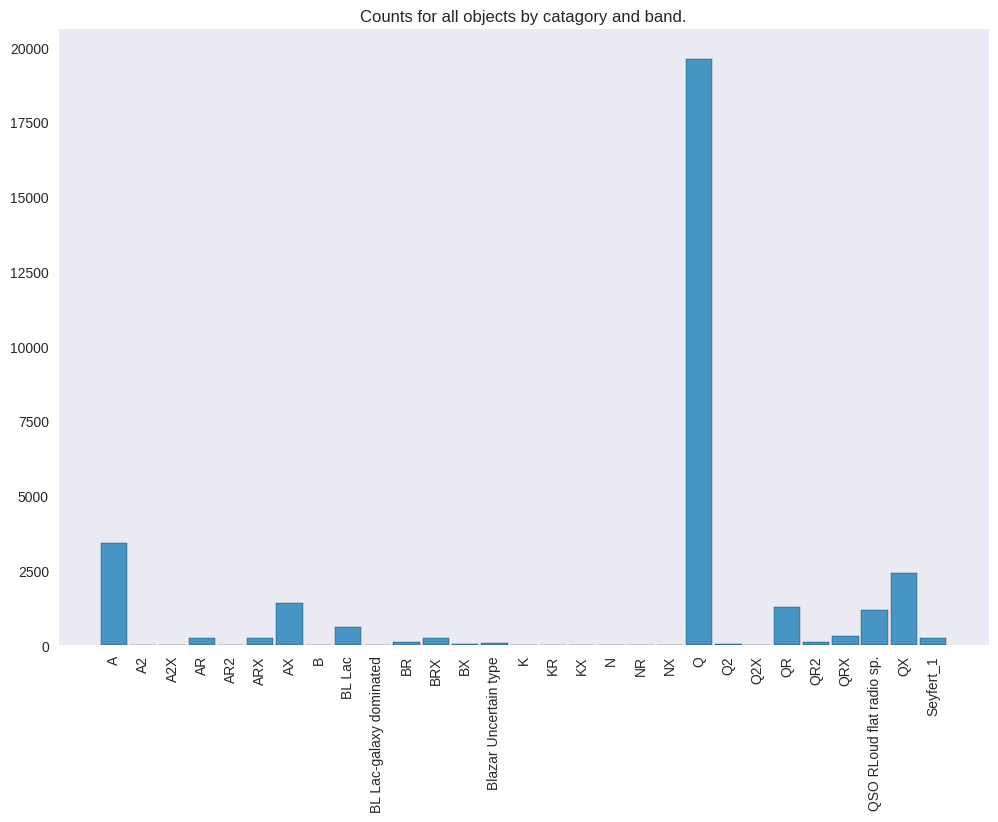

In [4]:
### plotting the distribution
dmdt_by_Name_Band = pd.read_pickle(dmdt_by_Name_Band_file)
type_array = dmdt_by_Name_Band['type'].to_numpy()

plt.figure(figsize=(12,8))

counts, bin_edges, _ = plt.hist(type_array, bins=len(set(type_array)), edgecolor='black', alpha=0.7, align='mid', rwidth=0.9)

categories = sorted(set(type_array))
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.xticks(bin_centers, labels=categories, rotation=90)
plt.title('Counts for all objects by catagory and band.')

plt.show()

del type_array, counts, bin_edges, dmdt_by_Name_Band

We'll only consider the Q, QR, and QX catagories, while watching out for that large diaparity!

In [5]:
dmdt_by_Name_Band = pd.read_pickle(dmdt_by_Name_Band_file)
dmdt_by_Name_Band = dmdt_by_Name_Band[dmdt_by_Name_Band['type'].isin(['Q', 'QR', 'QX'])]
dmdt_by_Name_Band = dmdt_by_Name_Band[dmdt_by_Name_Band['band'] == 'rg']
dmdt_by_Name_Band = dmdt_by_Name_Band.drop(columns=['n_good_det', 'band', 'hist_p_scale'])
dmdt_by_Name_Band

,name,type,histogram
6565,1WGA J16290+3724A,Q,"[[[0.0, 1.1455059890871462e-05, 0.0], [0.0, 2.672847307870008e-05, 0.0], [0.0, 0.0, 0.0], [0.0, 3.8183532969571546e-06, 0.0], [0.0, 0.0, 0.0], [0.0, 1.1455059890871462e-05, 0.0], [0.0, 1.909176648478577e-05, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 1.909176648478577e-05, 0.0], [0.0, 7.636706593914309e-06, 0.0], [0.0, 0.0, 0.0], [3.3508358660067755e-06, 1.1455059890871462e-05, 0.0], [0.0, 2.672847307870008e-05, 0.0], [3.3508358660067755e-06, 2.672847307870008e-05, 0.0], [0.0, 4.582023956348585e-05, 0.0], [2.0105015196040652e-05, 8.782212583001455e-05, 0.0], [0.00015078..."
6566,2MASX J15371580+5829336,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0],..."
6567,2QZ J095248.7+004930,Q,"[[[0.0, 7.254261878853827e-05, 0.0], [9.693209906460525e-05, 0.0007979688066739209, 0.0], [0.00014539814859690787, 0.00014508523757707654, 0.0], [9.693209906460525e-05, 0.0004352557127312296, 0.0], [0.0, 0.0007254261878853826, 0.0], [0.00014539814859690787, 7.254261878853827e-05, 0.0], [4.846604953230262e-05, 0.00014508523757707654, 0.0], [0.0001938641981292105, 0.0003627130939426913, 0.0], [0.00029079629719381574, 0.0005077983315197679, 0.0], [0.0, 0.0005803409503083062, 0.0], [0.0, 0.0003627130939426913, 0.0], [4.846604953230262e-05, 0.0006528835690968443, 0.0], [4.846604953230262e-05, 0..."
6568,2QZ J095543.3+010536,Q,"[[[0.0, 0.00029308323563892143, 0.0], [0.0003978779840848806, 0.00029308323563892143, 0.0], [0.001326259946949602, 0.00029308323563892143, 0.0], [0.0007957559681697613, 0.00029308323563892143, 0.0], [0.0010610079575596816, 0.0008792497069167644, 0.0], [0.0005305039787798408, 0.0008792497069167644, 0.0], [0.000663129973474801, 0.00029308323563892143, 0.0], [0.001326259946949602, 0.0020515826494724504, 0.0], [0.0009283819628647215, 0.0020515826494724504, 0.0], [0.001326259946949602, 0.0029308323563892145, 0.0], [0.0007957559681697613, 0.0, 0.0], [0.0017241379310344827, 0.0008792497069167644,..."
6569,2QZ J100058.3+000530,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.00011944577161968466, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0001554726368159204, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.00011944577161968466, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0004664179104477612, 0.0], [0.00023889154323936931, 0.0001554726368159204, 0.0], [0.0, 0.0001554726368159204, 0.0], [0.00011944577161968466, 0.0003109452736318408, 0.0], [0.000716674629718108, 0.0009328358208955224, 0.0], [0.0013139034878165313, 0.002021144278606965, 0.0], [0.000836120401337..."
...,...,...,...
31553,XBS J104509.3-012442,QX,"[[[0.0, 0.0, 0.0], [0.0006807351940095302, 0.0, 0.0], [0.0006807351940095302, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.00039277297721916735, 0.0], [0.0, 0.00039277297721916735, 0.0], [0.0, 0.0, 0.0], [0.0006807351940095302, 0.0, 0.0], [0.0013614703880190605, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0006807351940095302, 0.0, 0.0], [0.0006807351940095302, 0.00039277297721916735, 0.0], [0.0, 0.0, 0.0], [0.0013614703880190605, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0006807351940095302, 0.0, 0.0], [0.0006807351940095302, 0.0, 0.0], [0.002722940776038121, 0.006284367635506678, 0.0], [0.002722940776038..."
31554,XLSS J022249.5-051452,QX,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 

### RPCA with FBPCA

In [6]:
import sys
# sys.path.insert(0, '/home/shoaib/Thesis/dmdt_Analysis/')
sys.path.insert(0, Thesis_Files + 'Thesis/dmdt_Analysis/')

!pip install fbpca &> /dev/null
from fbpca_implementation import *

In [7]:
def get_FBPA_mean_backgrounds(histogram_list):
    r_histograms = np.array([arr[:, :, 0] for arr in histogram_list])
    g_histograms = np.array([arr[:, :, 1] for arr in histogram_list])

    M_r = np.stack([arr.flatten() for arr in r_histograms], axis=1)
    M_g = np.stack([arr.flatten() for arr in g_histograms], axis=1)

    L_r, S_r, examples =  pcp(M_r, maxiter=7, k=10, example_column=1000)
    L_g, S_g, examples =  pcp(M_g, maxiter=7, k=10, example_column=1000)

    r_max_background = np.array([L_r[i, :].mean() for i in range(len(L_r[:, 0]))])
    g_max_background = np.array([L_g[i, :].mean() for i in range(len(L_g[:, 0]))])

    r_max_background = r_max_background.reshape(histogram_list[0][:, :, 0].shape)
    g_max_background = g_max_background.reshape(histogram_list[0][:, :, 0].shape)

    background = np.zeros_like(histogram_list[0])
    background[:, :, 0] = r_max_background
    background[:, :, 1] = g_max_background
    return background


def get_FBPA_max_backgrounds(histogram_list):
    r_histograms = np.array([arr[:, :, 0] for arr in histogram_list])
    g_histograms = np.array([arr[:, :, 1] for arr in histogram_list])

    M_r = np.stack([arr.flatten() for arr in r_histograms], axis=1)
    M_g = np.stack([arr.flatten() for arr in g_histograms], axis=1)

    L_r, S_r, examples =  pcp(M_r, maxiter=7, k=10, example_column=1000)
    L_g, S_g, examples =  pcp(M_g, maxiter=7, k=10, example_column=1000)

    g_max_background = np.array([L_g[i, :].max() for i in range(len(L_g[:, 0]))])
    r_max_background = np.array([L_r[i, :].max() for i in range(len(L_r[:, 0]))])

    r_max_background = r_max_background.reshape(histogram_list[0][:, :, 0].shape)
    g_max_background = g_max_background.reshape(histogram_list[0][:, :, 0].shape)

    background = np.zeros_like(histogram_list[0])
    background[:, :, 0] = r_max_background
    background[:, :, 1] = g_max_background
    return background


def get_FBPA_median_backgrounds(histogram_list):
    r_histograms = np.array([arr[:, :, 0] for arr in histogram_list])
    g_histograms = np.array([arr[:, :, 1] for arr in histogram_list])

    M_r = np.stack([arr.flatten() for arr in r_histograms], axis=1)
    M_g = np.stack([arr.flatten() for arr in g_histograms], axis=1)

    L_r, S_r, examples =  pcp(M_r, maxiter=7, k=10, example_column=1000)
    L_g, S_g, examples =  pcp(M_g, maxiter=7, k=10, example_column=1000)

    g_max_background = np.array([np.median(L_g[i, :]) for i in range(len(L_g[:, 0]))])
    r_max_background = np.array([np.median(L_r[i, :]) for i in range(len(L_r[:, 0]))])

    r_max_background = r_max_background.reshape(histogram_list[0][:, :, 0].shape)
    g_max_background = g_max_background.reshape(histogram_list[0][:, :, 0].shape)

    background = np.zeros_like(histogram_list[0])
    background[:, :, 0] = r_max_background
    background[:, :, 1] = g_max_background
    return background

In [8]:
Q_max_background = get_FBPA_max_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram'].to_numpy())
QR_max_background = get_FBPA_max_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram'].to_numpy())
QX_max_background = get_FBPA_max_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram'].to_numpy())

rank sv: 1
error:  0.5244020549901312
rank sv: 126
error:  0.07337089679515753
rank sv: 93
error:  0.0048464950013046345
rank sv: 218
error:  0.00012785044688104748
rank sv: 175
error:  3.167409202362735e-06
rank sv: 174
error:  1.1876953619039278e-07
rank sv: 174
error:  4.450380469440816e-09
rank sv: 1
error:  0.5119041754457092
rank sv: 126
error:  0.08107994500869374
rank sv: 83
error:  0.005089872164453665
rank sv: 208
error:  0.00012376141966221254
rank sv: 173
error:  3.278124887584796e-06
rank sv: 298
error:  1.4688898166728236e-07
rank sv: 224
error:  7.96000654939298e-09
rank sv: 1
error:  0.45243307702656793
rank sv: 65
error:  0.05362319994666996
rank sv: 61
error:  0.0026685147943563076
rank sv: 125
error:  7.617208988785714e-05
rank sv: 125
error:  2.1982771600794266e-06
rank sv: 189
error:  9.699255176768688e-08
rank sv: 167
error:  5.272313687844562e-09
rank sv: 1
error:  0.4578998277598402
rank sv: 65
error:  0.059170481318355256
rank sv: 60
error:  0.00275785300612258

In [9]:
def subtract_background(histogram, background):
    subtracted = histogram - background
    subtracted = (subtracted - subtracted[:, :, :-1].min()) / (subtracted[:, :, :-1].max() - subtracted[:, :, :-1].min())
    subtracted[:, :, 2] = np.zeros_like(subtracted[:, :, 2])
    return subtracted

dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'Q', 'histogram_minus_max_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'Q', 'histogram'].apply(lambda x: subtract_background(x, Q_max_background))
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QR', 'histogram_minus_max_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QR', 'histogram'].apply(lambda x: subtract_background(x, QR_max_background))
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QX', 'histogram_minus_max_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QX', 'histogram'].apply(lambda x: subtract_background(x, QX_max_background))

### Running FastAI on it

In [10]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   # Input: images, Output: categories
    get_x=lambda r: numpy_to_pil(r['histogram_minus_max_background']),  # Convert NumPy array to image
    get_y=lambda r: r['type'],           # Get the label (type)
    splitter=RandomSplitter(valid_pct=0.2),  # Split into training and validation sets
    item_tfms=Resize(224)
)

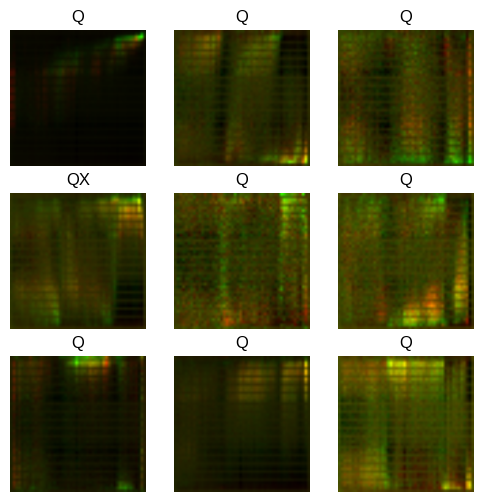

In [11]:
dls = dblock.dataloaders(dmdt_by_Name_Band, bs=32)  # Batch size of 32
dls.show_batch(max_n=9, figsize=(6, 6))

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 181MB/s]


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

Suggested Learning Rates: Min: 0.0014454397605732083


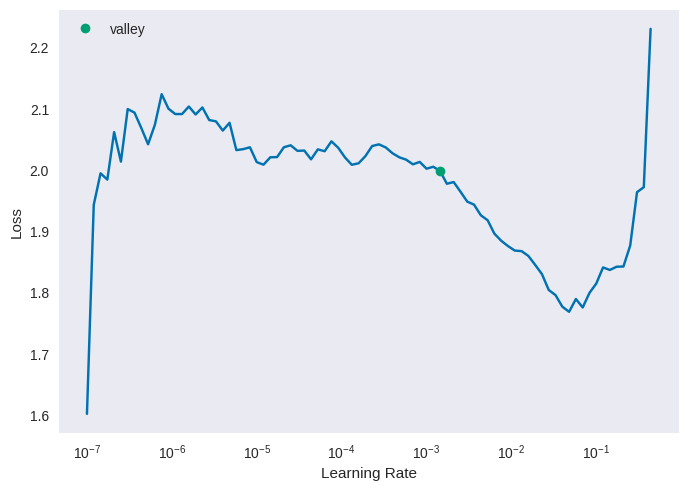

In [12]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate])

lr_min = learn.lr_find(show_plot=True)
print(f"Suggested Learning Rates: Min: {lr_min.valley}")

In [13]:
learn.fine_tune(20, base_lr=lr_min.valley, cbs=[SaveModelCallback(monitor='valid_loss', comp=np.less, fname='equivalent_bins_max_background_model'), EarlyStoppingCallback(monitor='valid_loss', patience=3)])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.615139,0.483701,0.841041,0.158959,01:12


Better model found at epoch 0 with valid_loss value: 0.48370128870010376.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.268701,0.202255,0.924715,0.075285,01:43
1,0.148669,0.122776,0.955474,0.044526,01:43
2,0.093019,0.098335,0.964724,0.035276,01:43
3,0.070343,0.063902,0.976984,0.023016,01:43
4,0.043102,0.035533,0.986234,0.013766,01:43
5,0.039864,0.032151,0.988815,0.011185,01:43
6,0.032756,0.032261,0.990751,0.009249,01:43
7,0.013578,0.053059,0.986449,0.013551,01:43
8,0.028299,0.031652,0.990105,0.009895,01:43
9,0.014567,0.021433,0.992687,0.007313,01:43


Better model found at epoch 0 with valid_loss value: 0.20225495100021362.
Better model found at epoch 1 with valid_loss value: 0.12277587503194809.
Better model found at epoch 2 with valid_loss value: 0.09833478182554245.
Better model found at epoch 3 with valid_loss value: 0.0639021247625351.
Better model found at epoch 4 with valid_loss value: 0.03553327918052673.
Better model found at epoch 5 with valid_loss value: 0.03215060010552406.
Better model found at epoch 8 with valid_loss value: 0.031651996076107025.
Better model found at epoch 9 with valid_loss value: 0.021433470770716667.
Better model found at epoch 10 with valid_loss value: 0.01928289420902729.
Better model found at epoch 11 with valid_loss value: 0.015308346599340439.
Better model found at epoch 14 with valid_loss value: 0.013920131139457226.
Better model found at epoch 15 with valid_loss value: 0.010129924863576889.
No improvement since epoch 15: early stopping


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:61: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


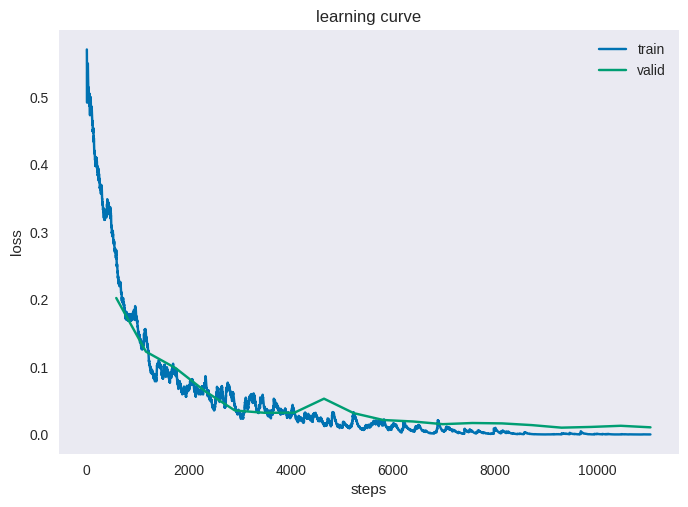

In [14]:
learn.recorder.plot_loss()
learn.load('equivalent_bins_max_background_model')

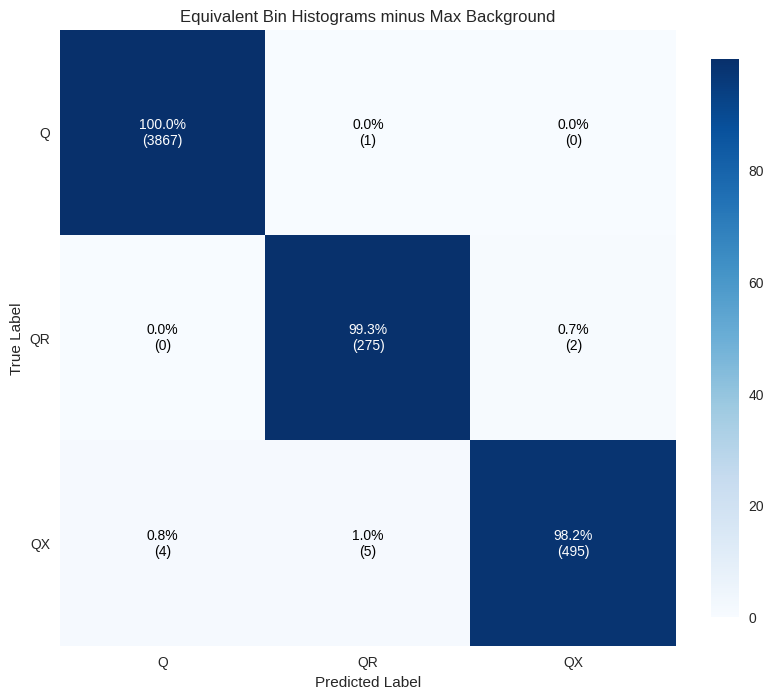

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
cm = interp.confusion_matrix()
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots(figsize=(9, 8))
im = ax.imshow(cm_percent, cmap='Blues', interpolation='nearest')

# Add text annotations
for i in range(len(cm_percent)):
    for j in range(len(cm_percent[i])):
        text = f"{cm_percent[i, j]:.1f}%\n({int(cm[i, j])})"
        color = "white" if cm_percent[i, j] > 50 else "black"
        ax.text(j, i, text, ha="center", va="center", color=color)

ax.set_title("Equivalent Bin Histograms minus Max Background")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_xticks(range(len(interp.vocab)))
ax.set_yticks(range(len(interp.vocab)))
ax.set_xticklabels(interp.vocab)
ax.set_yticklabels(interp.vocab)
plt.colorbar(im, fraction=0.04)
plt.show()

In [23]:
preds, targets = learn.get_preds()
pred_classes = preds.argmax(dim=1)

# Generate the report
report = classification_report(targets, pred_classes, target_names=dls.vocab)
print(report)

              precision    recall  f1-score   support

           Q       1.00      1.00      1.00      3868
          QR       0.98      0.99      0.99       277
          QX       1.00      0.98      0.99       504

    accuracy                           1.00      4649
   macro avg       0.99      0.99      0.99      4649
weighted avg       1.00      1.00      1.00      4649



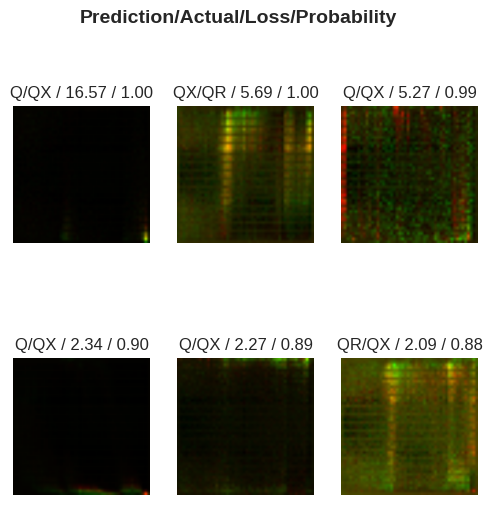

In [24]:
interp.plot_top_losses(k=6, figsize=(6, 6))  # Show 5 samples with largest loss

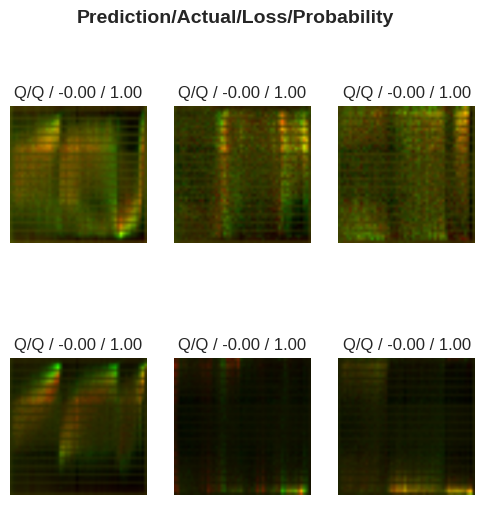

In [25]:
interp.plot_top_losses(k=6, figsize=(6, 6), largest=False)  # Show 5 samples with lowest loss

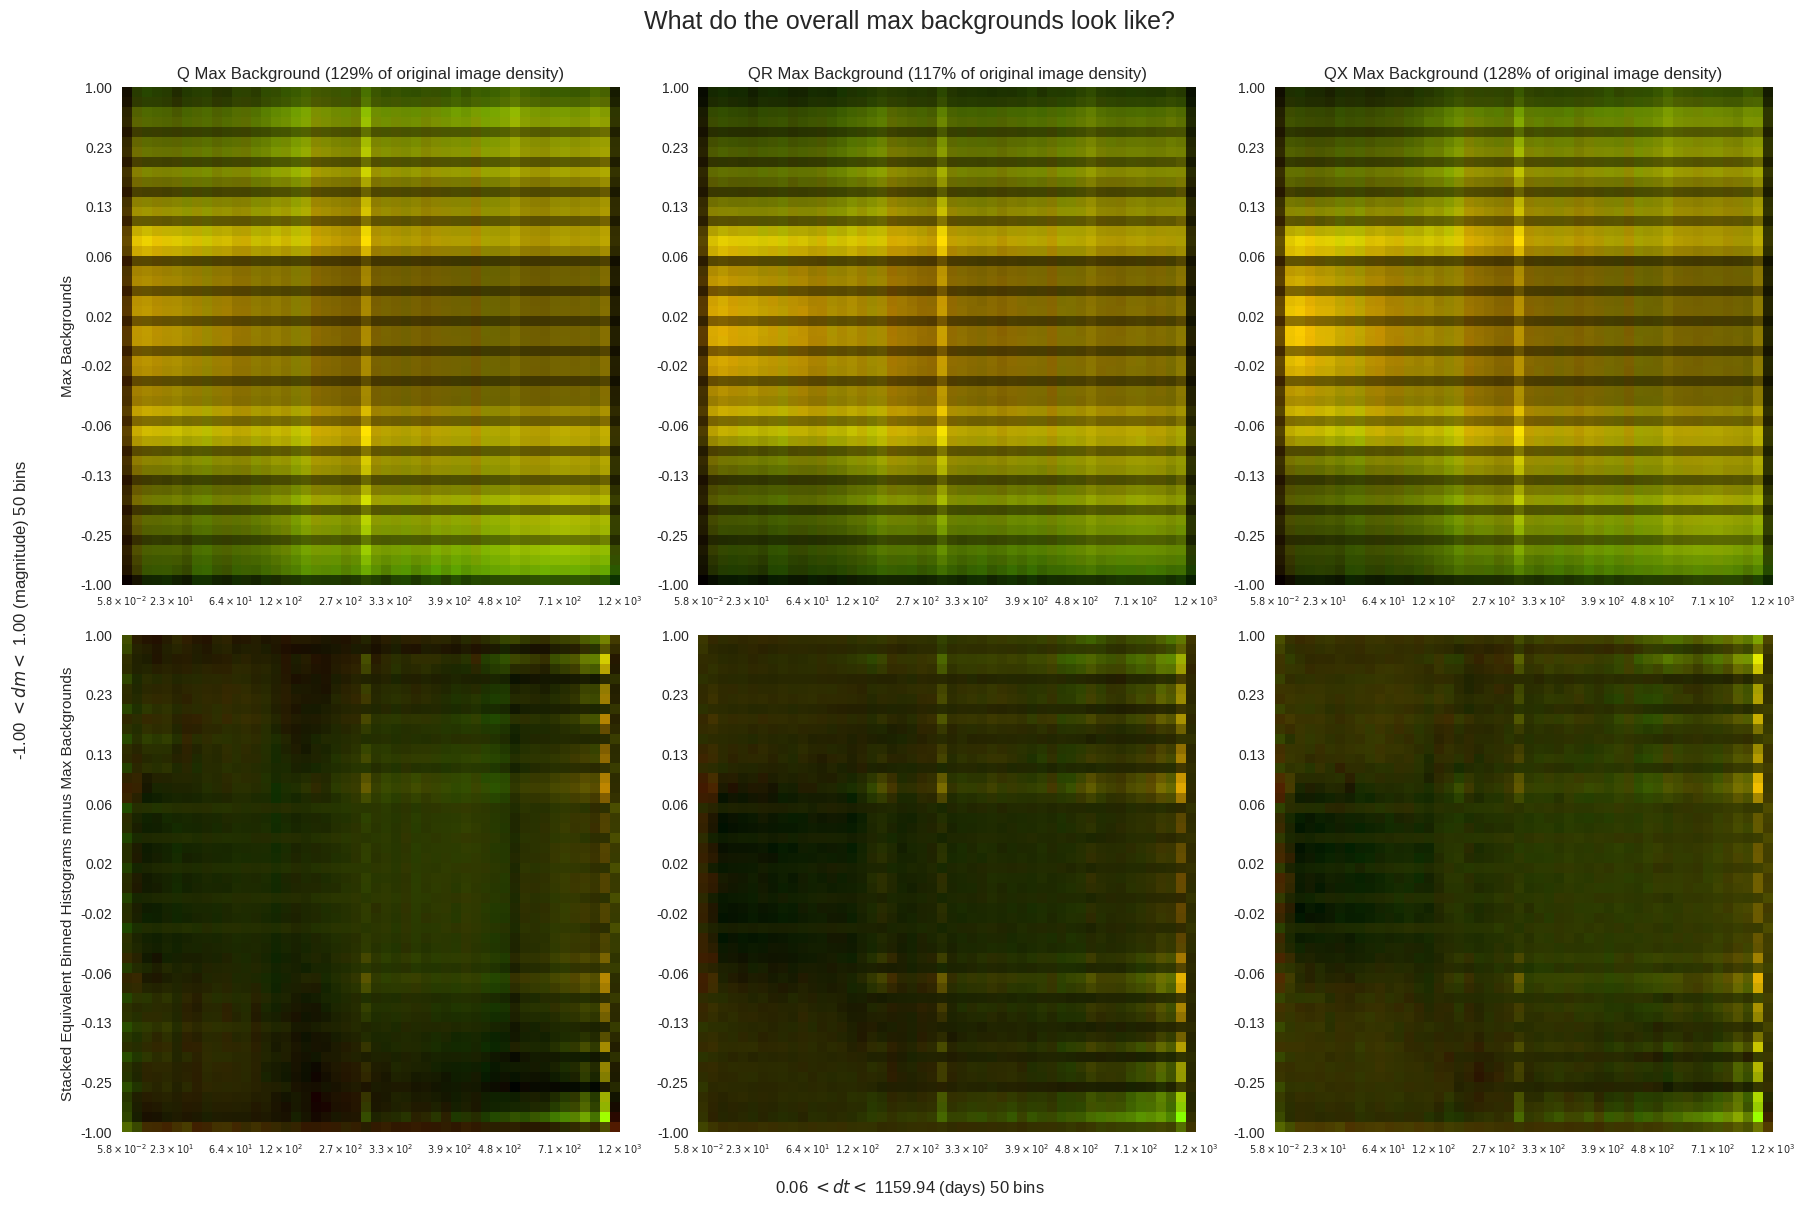

In [26]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

max_backgrounds = [Q_max_background, QR_max_background, QX_max_background]
total_densities = [background.sum() / 2 for background in max_backgrounds]
background_titles = [f'Q Max Background ({total_densities[0]:.0%} of original image density)',
                     f'QR Max Background ({total_densities[1]:.0%} of original image density)',
                     f'QX Max Background ({total_densities[2]:.0%} of original image density)']

for ax, max_background, title in zip(axs[0, :], max_backgrounds, background_titles):
    ax.imshow(numpy_to_pil(max_background), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Max Backgrounds')

histograms_max_subtracted = [norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram_minus_max_background'].sum()),
                             norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram_minus_max_background'].sum()),
                             norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram_minus_max_background'].sum())]

for ax, hist in zip(axs[1, :], histograms_max_subtracted):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Stacked Equivalent Binned Histograms minus Max Backgrounds')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('What do the overall max backgrounds look like?', size=18, y=1)

plt.tight_layout()

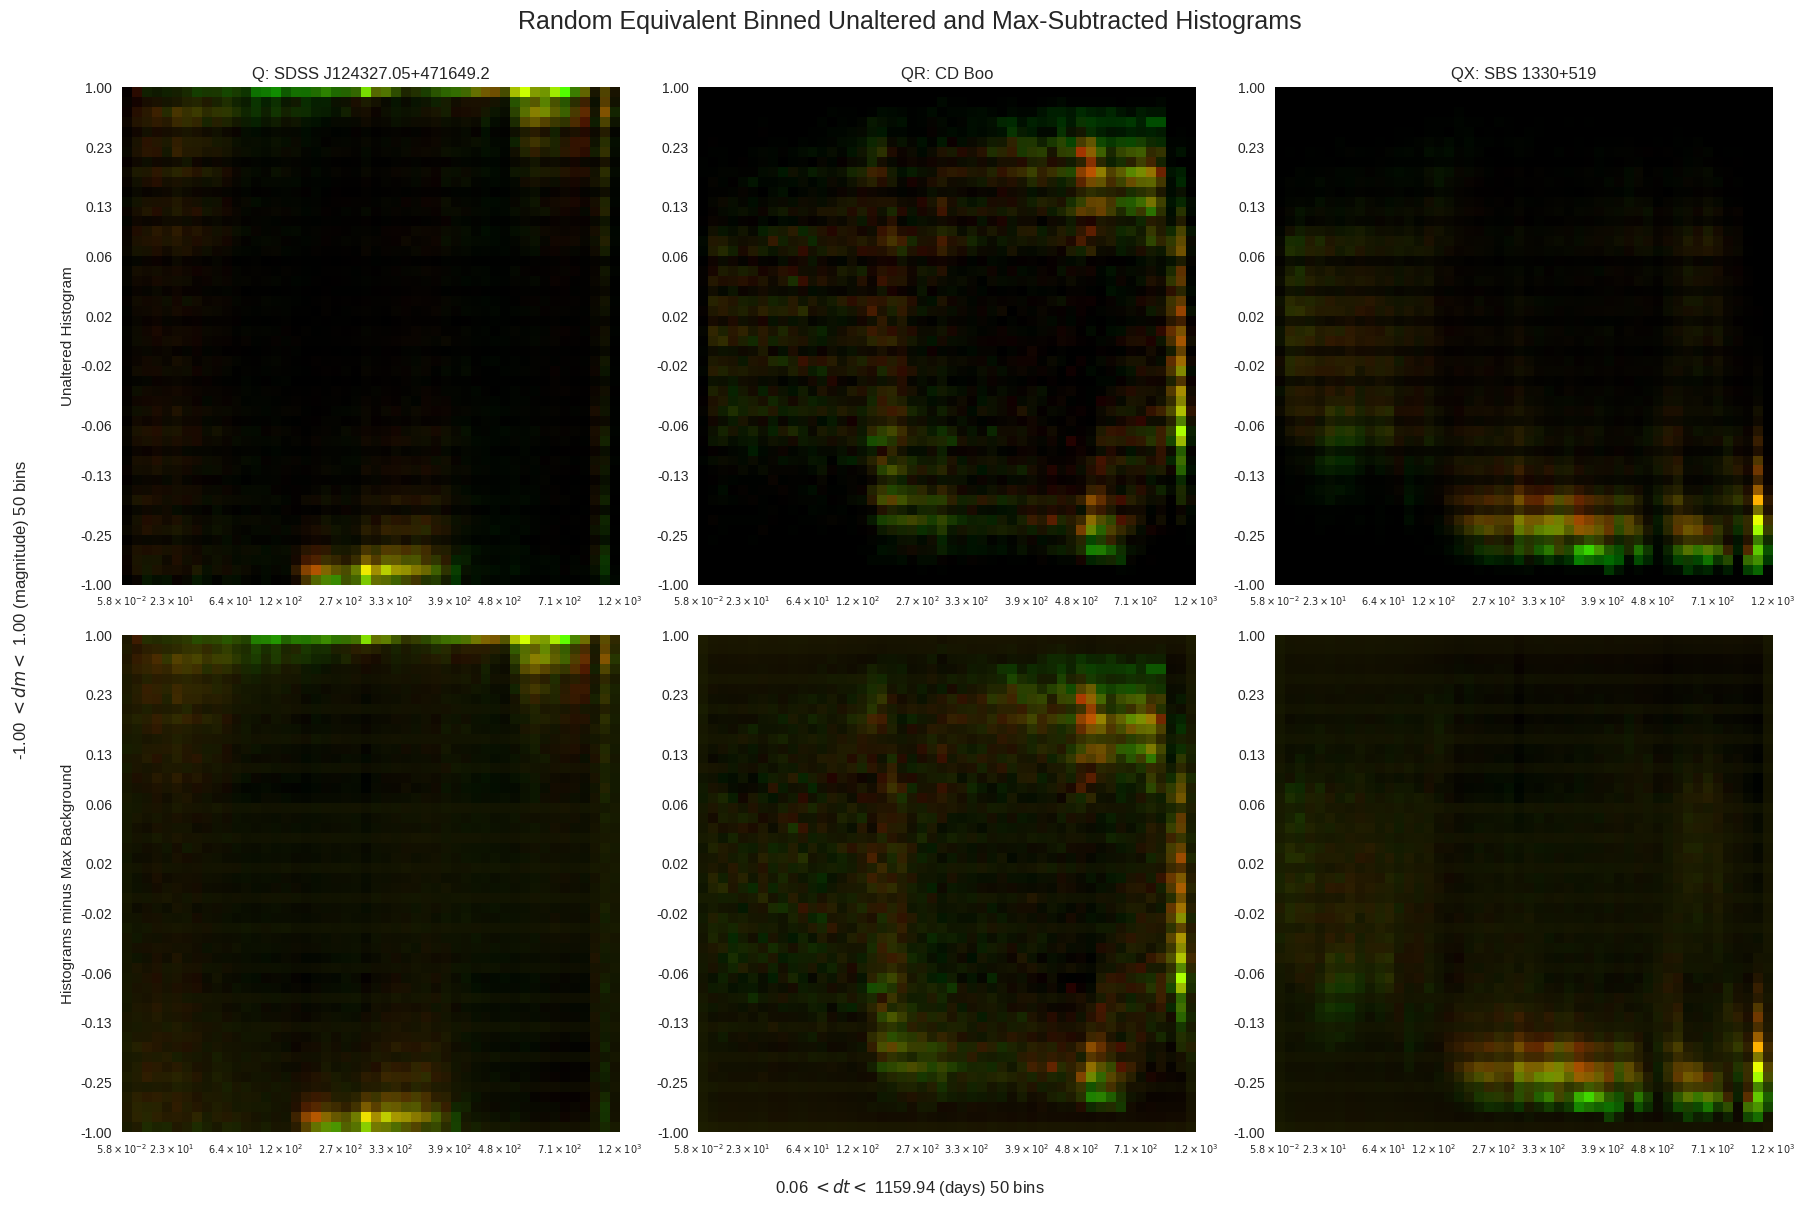

In [27]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


random_objects = [dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX'].sample(1)]
histograms = [obj['histogram'].iloc[0] for obj in random_objects]
max_subtracted_histograms = [obj['histogram_minus_max_background'].iloc[0] for obj in random_objects]

titles = [f"Q: {random_objects[0]['name'].iloc[0]}", f"QR: {random_objects[1]['name'].iloc[0]}", f"QX: {random_objects[2]['name'].iloc[0]}"]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))


for ax, hist, title in zip(axs[0, :], histograms, titles):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Unaltered Histogram')

for ax, hist in zip(axs[1, :], max_subtracted_histograms):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Histograms minus Max Background')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('Random Equivalent Binned Unaltered and Max-Subtracted Histograms', size=18, y=1)

plt.tight_layout()

# Trying this with mean background subtraction

In [28]:
Q_mean_background = get_FBPA_mean_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram'].to_numpy())
QR_mean_background = get_FBPA_mean_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram'].to_numpy())
QX_mean_background = get_FBPA_mean_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram'].to_numpy())

rank sv: 1
error:  0.5244017188908697
rank sv: 126
error:  0.07336706809163496
rank sv: 91
error:  0.0048564563914380715
rank sv: 216
error:  0.0001287810886509797
rank sv: 175
error:  3.1453739074321057e-06
rank sv: 173
error:  1.1386920746213127e-07
rank sv: 173
error:  3.0213583595799586e-09
rank sv: 1
error:  0.5119455881651594
rank sv: 126
error:  0.08109205932621182
rank sv: 84
error:  0.005084340001841074
rank sv: 209
error:  0.00012263284118998696
rank sv: 175
error:  3.2691041195154225e-06
rank sv: 300
error:  1.4793651112777424e-07
rank sv: 224
error:  8.251668325917584e-09
rank sv: 1
error:  0.45243124024264336
rank sv: 65
error:  0.053660736999913465
rank sv: 60
error:  0.002674797387318132
rank sv: 124
error:  7.678635296575735e-05
rank sv: 188
error:  2.0654597826542063e-06
rank sv: 165
error:  8.884759515169828e-08
rank sv: 229
error:  5.320371432514764e-09
rank sv: 1
error:  0.45789729366592014
rank sv: 65
error:  0.05916933855240676
rank sv: 60
error:  0.00275839526704

In [29]:
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'Q', 'histogram_minus_mean_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'Q', 'histogram'].apply(lambda x: subtract_background(x, Q_mean_background))
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QR', 'histogram_minus_mean_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QR', 'histogram'].apply(lambda x: subtract_background(x, QR_mean_background))
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QX', 'histogram_minus_mean_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QX', 'histogram'].apply(lambda x: subtract_background(x, QX_mean_background))

In [30]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   # Input: images, Output: categories
    get_x=lambda r: numpy_to_pil(r['histogram_minus_mean_background']),  # Convert NumPy array to image
    get_y=lambda r: r['type'],           # Get the label (type)
    splitter=RandomSplitter(valid_pct=0.2),  # Split into training and validation sets
    item_tfms=Resize(224)
)

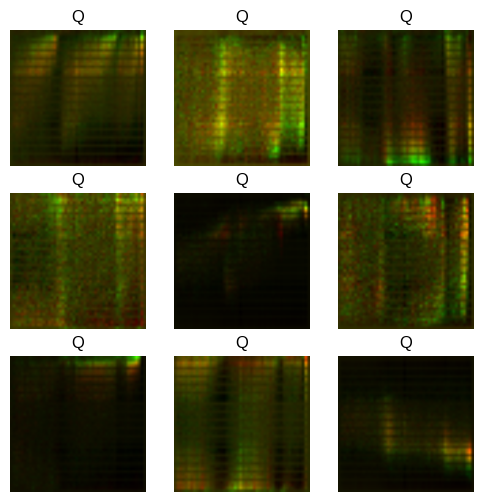

In [31]:
dls = dblock.dataloaders(dmdt_by_Name_Band, bs=32)  # Batch size of 32
dls.show_batch(max_n=9, figsize=(6, 6))

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

Suggested Learning Rates: Min: 0.0030199517495930195


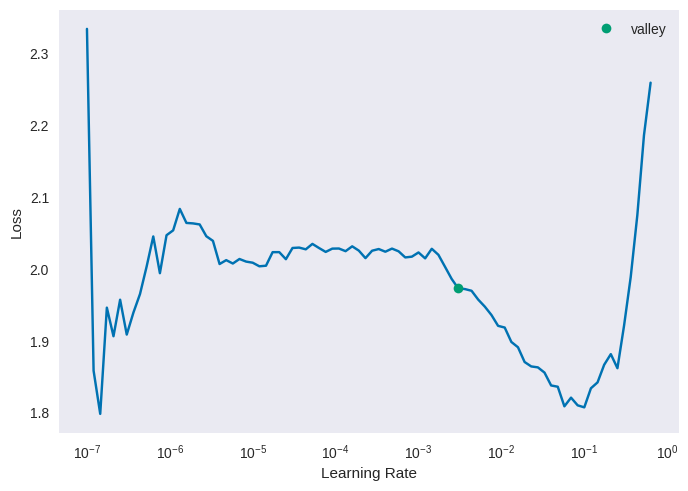

In [32]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate])

lr_min = learn.lr_find(show_plot=True)
print(f"Suggested Learning Rates: Min: {lr_min.valley}")

In [33]:
learn.fine_tune(20, base_lr=lr_min.valley, cbs=[SaveModelCallback(monitor='valid_loss', comp=np.less, fname='equivalent_bins_mean_background_model'), EarlyStoppingCallback(monitor='valid_loss', patience=3)])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.556857,0.500730,0.835018,0.164982,01:15


Better model found at epoch 0 with valid_loss value: 0.5007302165031433.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.209815,0.126912,0.952248,0.047752,01:44
1,0.096372,0.084076,0.967735,0.032265,01:44
2,0.071937,0.052014,0.980426,0.019574,01:43
3,0.086334,0.127241,0.960207,0.039794,01:44
4,0.044719,0.086875,0.971607,0.028393,01:44
5,0.057027,0.083855,0.966229,0.033771,01:43


Better model found at epoch 0 with valid_loss value: 0.1269121617078781.
Better model found at epoch 1 with valid_loss value: 0.08407599478960037.
Better model found at epoch 2 with valid_loss value: 0.05201389268040657.
No improvement since epoch 2: early stopping


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:61: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


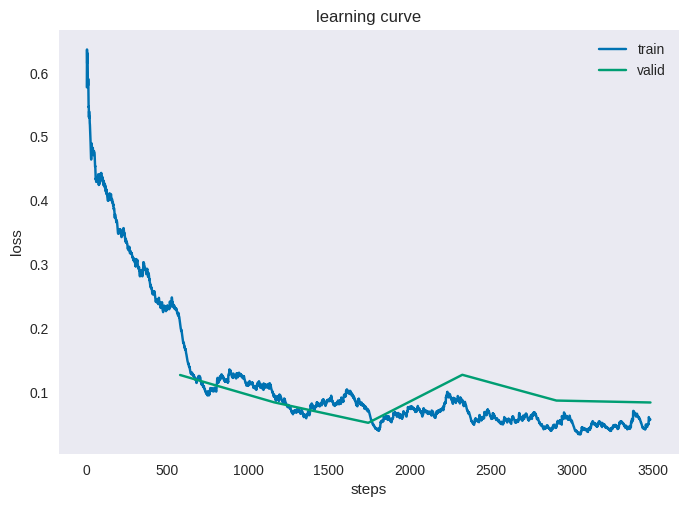

In [34]:
learn.recorder.plot_loss()
learn.load('equivalent_bins_mean_background_model')

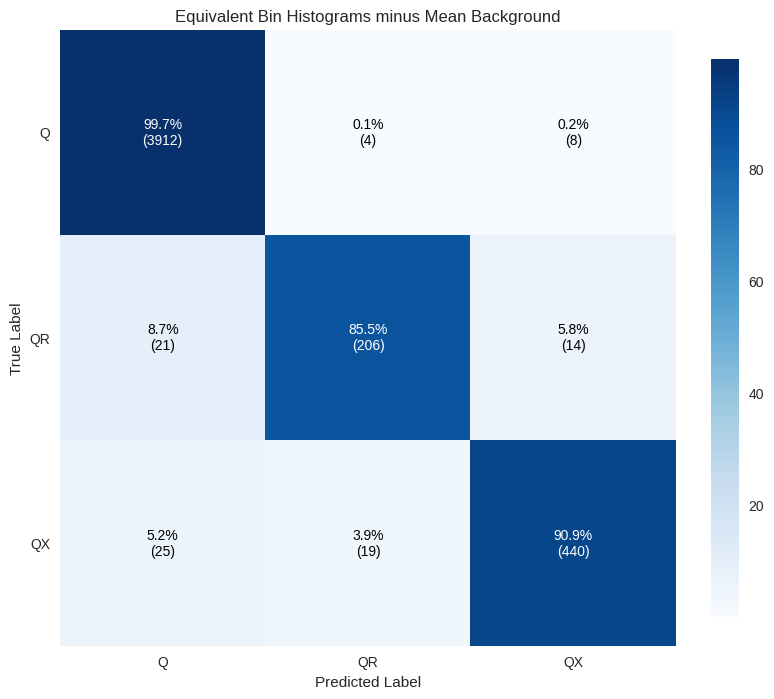

In [35]:
interp = ClassificationInterpretation.from_learner(learn)
cm = interp.confusion_matrix()
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots(figsize=(9, 8))
im = ax.imshow(cm_percent, cmap='Blues', interpolation='nearest')

# Add text annotations
for i in range(len(cm_percent)):
    for j in range(len(cm_percent[i])):
        text = f"{cm_percent[i, j]:.1f}%\n({int(cm[i, j])})"
        color = "white" if cm_percent[i, j] > 50 else "black"
        ax.text(j, i, text, ha="center", va="center", color=color)

ax.set_title("Equivalent Bin Histograms minus Mean Background")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_xticks(range(len(interp.vocab)))
ax.set_yticks(range(len(interp.vocab)))
ax.set_xticklabels(interp.vocab)
ax.set_yticklabels(interp.vocab)
plt.colorbar(im, fraction=0.04)
plt.show()

In [36]:
preds, targets = learn.get_preds()
pred_classes = preds.argmax(dim=1)

# Generate the report
report = classification_report(targets, pred_classes, target_names=dls.vocab)
print(report)

              precision    recall  f1-score   support

           Q       0.99      1.00      0.99      3924
          QR       0.90      0.85      0.88       241
          QX       0.95      0.91      0.93       484

    accuracy                           0.98      4649
   macro avg       0.95      0.92      0.93      4649
weighted avg       0.98      0.98      0.98      4649



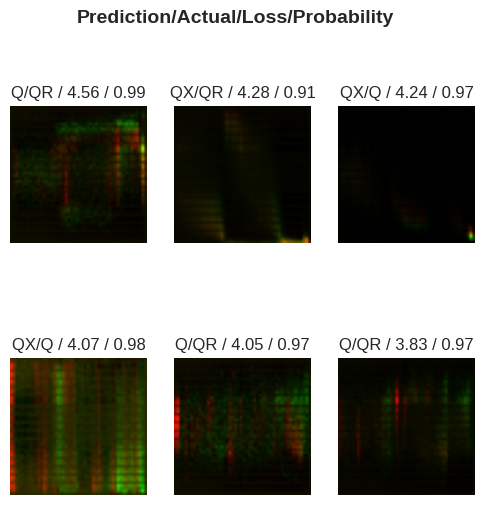

In [37]:
interp.plot_top_losses(k=6, figsize=(6, 6))  # Show 5 samples with largest loss

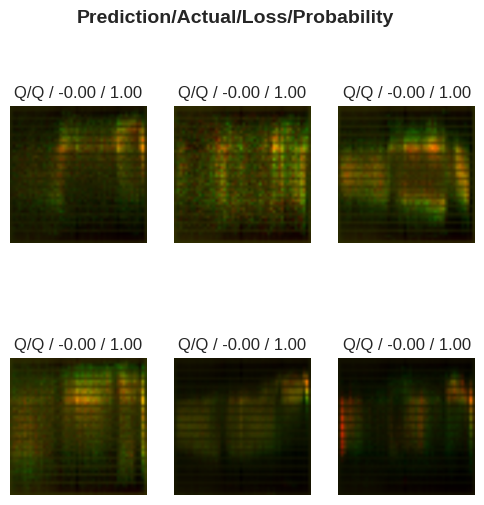

In [38]:
interp.plot_top_losses(k=6, figsize=(6, 6), largest=False)  # Show 5 samples with lowest loss

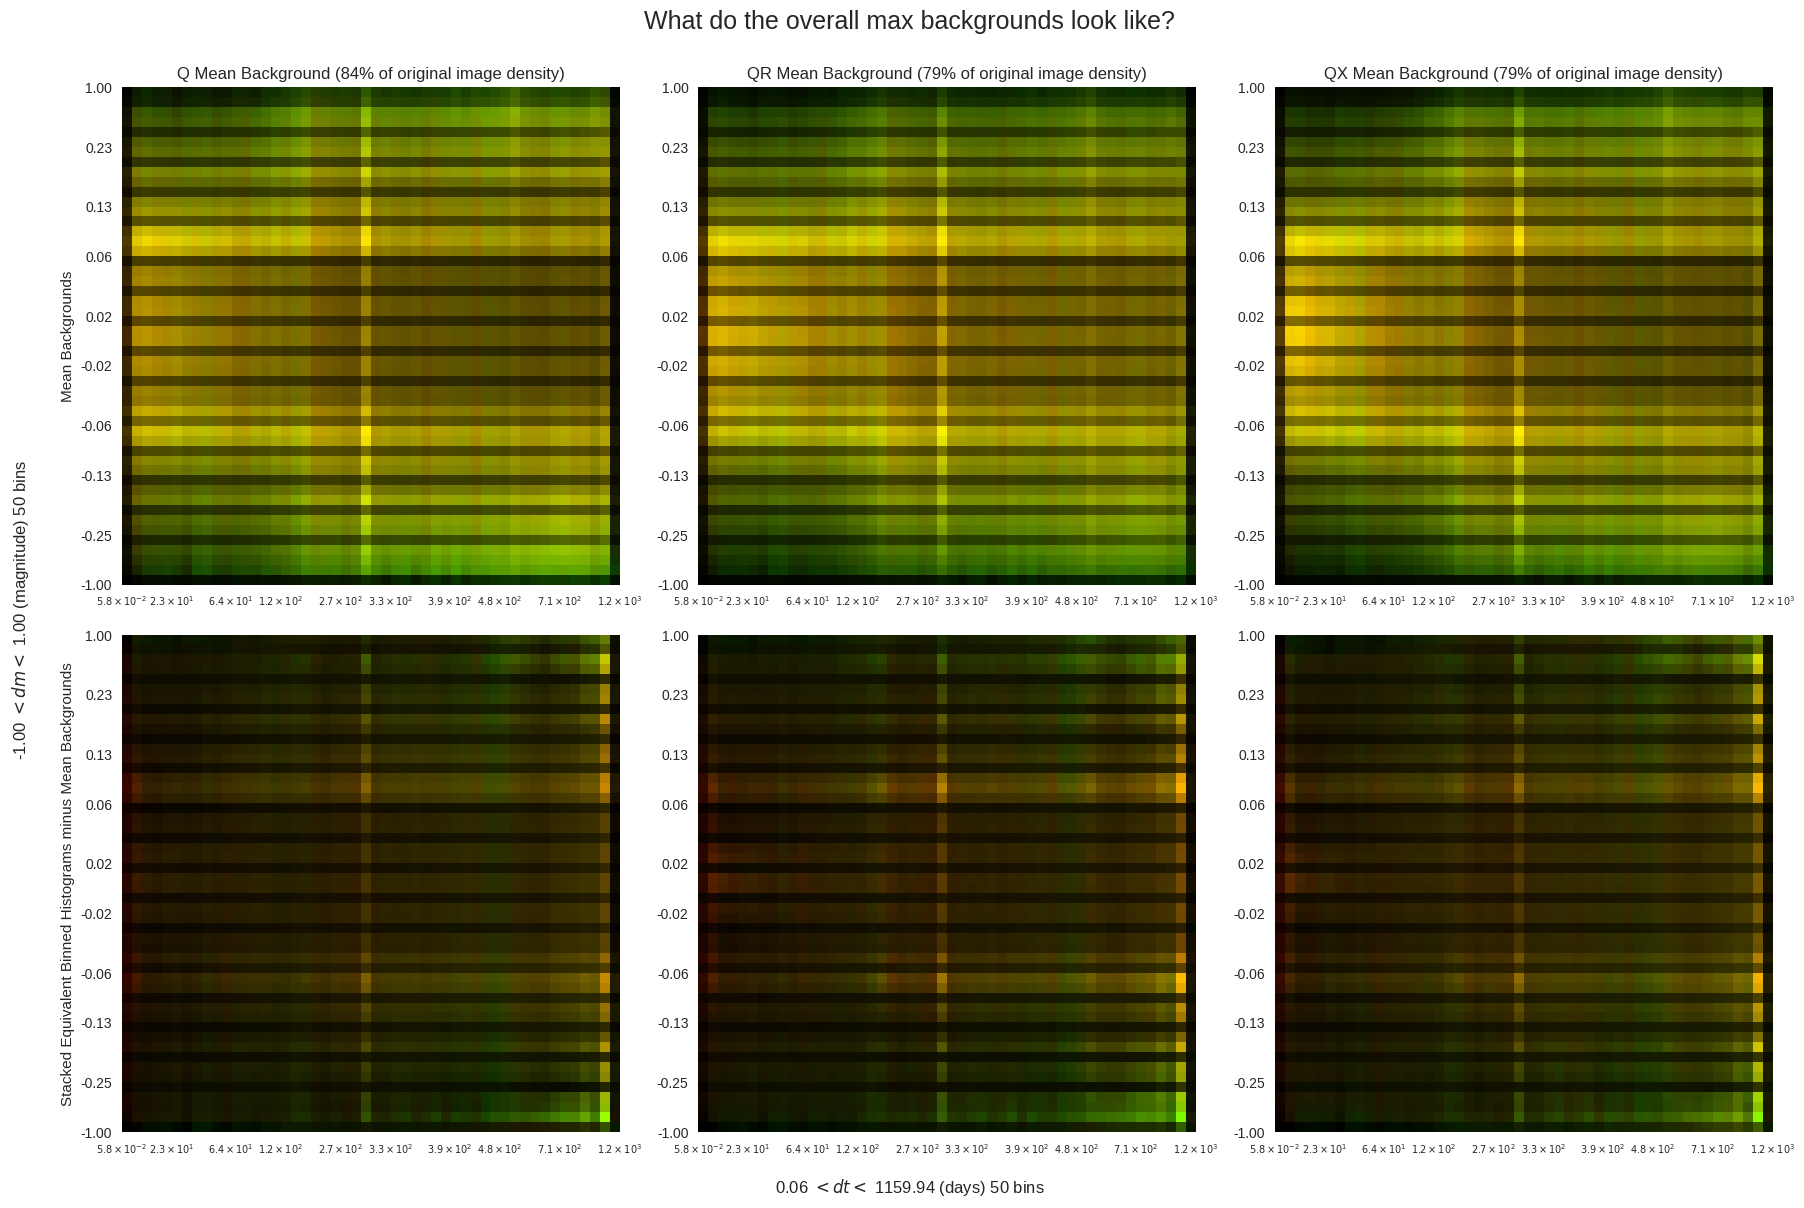

In [39]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

mean_backgrounds = [Q_mean_background, QR_mean_background, QX_mean_background]
total_densities = [background.sum() / 2 for background in mean_backgrounds]
background_titles = [f'Q Mean Background ({total_densities[0]:.0%} of original image density)',
                     f'QR Mean Background ({total_densities[1]:.0%} of original image density)',
                     f'QX Mean Background ({total_densities[2]:.0%} of original image density)']

for ax, mean_background, title in zip(axs[0, :], mean_backgrounds, background_titles):
    ax.imshow(numpy_to_pil(mean_background), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Mean Backgrounds')

histograms_mean_subtracted = [norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram_minus_mean_background'].sum()),
                              norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram_minus_mean_background'].sum()),
                              norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram_minus_mean_background'].sum())]

for ax, hist in zip(axs[1, :], histograms_mean_subtracted):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Stacked Equivalent Binned Histograms minus Mean Backgrounds')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('What do the overall max backgrounds look like?', size=18, y=1)

plt.tight_layout()

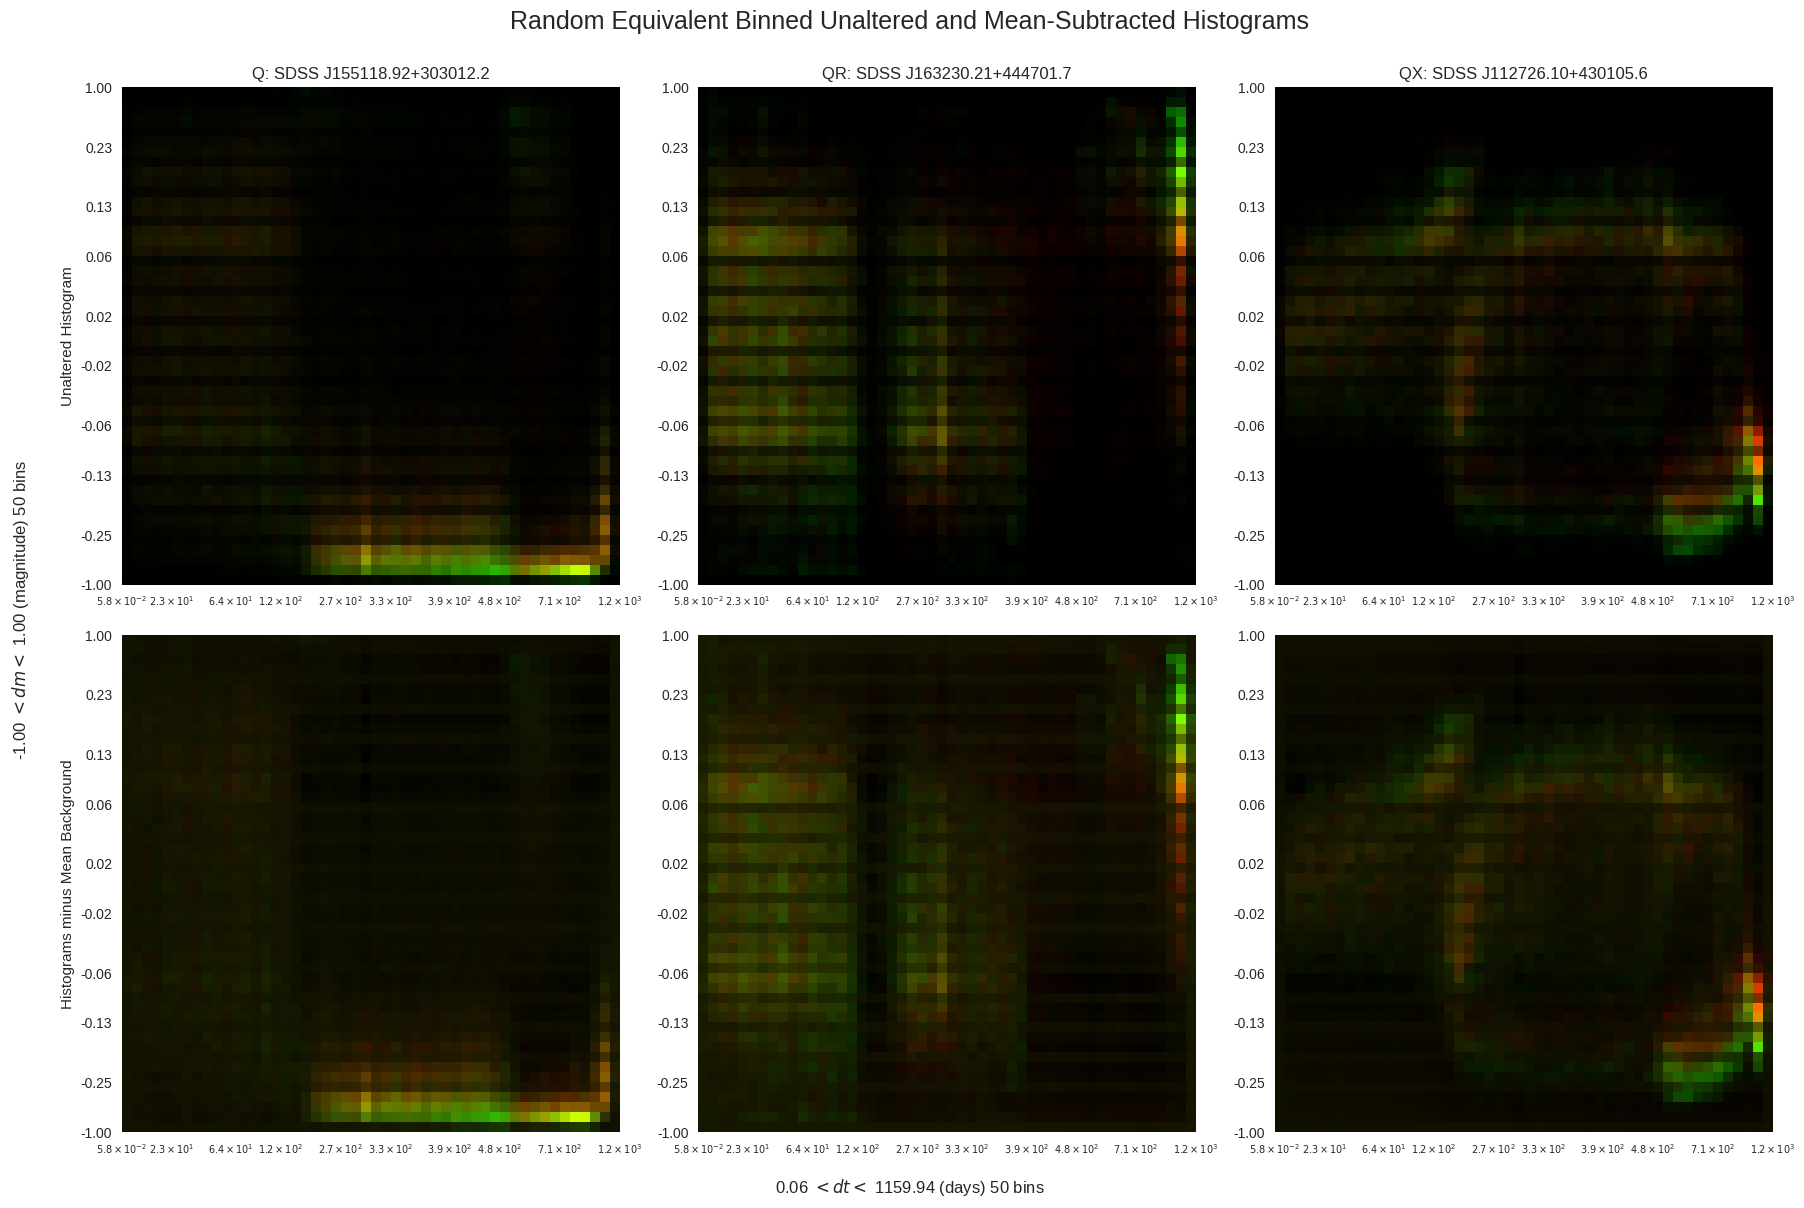

In [40]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


random_objects = [dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX'].sample(1)]
histograms = [obj['histogram'].iloc[0] for obj in random_objects]
mean_subtracted_histograms = [obj['histogram_minus_mean_background'].iloc[0] for obj in random_objects]

titles = [f"Q: {random_objects[0]['name'].iloc[0]}", f"QR: {random_objects[1]['name'].iloc[0]}", f"QX: {random_objects[2]['name'].iloc[0]}"]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))


for ax, hist, title in zip(axs[0, :], histograms, titles):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Unaltered Histogram')

for ax, hist in zip(axs[1, :], mean_subtracted_histograms):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Histograms minus Mean Background')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('Random Equivalent Binned Unaltered and Mean-Subtracted Histograms', size=18, y=1)

plt.tight_layout()

# Trying this with mean background subtraction

In [41]:
Q_median_background = get_FBPA_median_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram'].to_numpy())
QR_median_background = get_FBPA_median_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram'].to_numpy())
QX_median_background = get_FBPA_median_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram'].to_numpy())

rank sv: 1
error:  0.524402141544239
rank sv: 126
error:  0.07337139709965083
rank sv: 92
error:  0.0048497296589491215
rank sv: 217
error:  0.00012839057624105214
rank sv: 176
error:  3.176520580498888e-06
rank sv: 175
error:  1.2198351725210248e-07
rank sv: 300
error:  4.4689989790816155e-09
rank sv: 1
error:  0.5119397927306942
rank sv: 126
error:  0.08110517139148457
rank sv: 84
error:  0.005083930315377541
rank sv: 209
error:  0.00012254217952814973
rank sv: 175
error:  3.188107338778777e-06
rank sv: 300
error:  1.369670227332523e-07
rank sv: 225
error:  8.130150564911542e-09
rank sv: 1
error:  0.4524322250172757
rank sv: 65
error:  0.053614205240177966
rank sv: 61
error:  0.0026699712810795985
rank sv: 125
error:  7.602370983463131e-05
rank sv: 124
error:  2.2830768912455675e-06
rank sv: 188
error:  1.051839092054051e-07
rank sv: 167
error:  5.567438830263589e-09
rank sv: 1
error:  0.45789828074952266
rank sv: 65
error:  0.05914663089828695
rank sv: 60
error:  0.00275578222465371

In [42]:
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'Q', 'histogram_minus_median_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'Q', 'histogram'].apply(lambda x: subtract_background(x, Q_median_background))
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QR', 'histogram_minus_median_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QR', 'histogram'].apply(lambda x: subtract_background(x, QR_median_background))
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QX', 'histogram_minus_median_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QX', 'histogram'].apply(lambda x: subtract_background(x, QX_median_background))

In [43]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   # Input: images, Output: categories
    get_x=lambda r: numpy_to_pil(r['histogram_minus_median_background']),  # Convert NumPy array to image
    get_y=lambda r: r['type'],           # Get the label (type)
    splitter=RandomSplitter(valid_pct=0.2),  # Split into training and validation sets
    item_tfms=Resize(224)
)

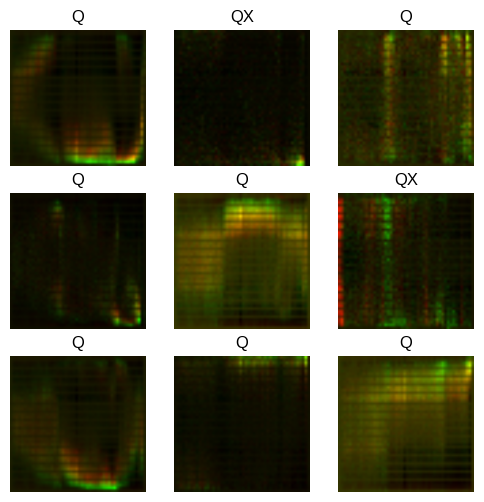

In [44]:
dls = dblock.dataloaders(dmdt_by_Name_Band, bs=32)  # Batch size of 32
dls.show_batch(max_n=9, figsize=(6, 6))

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

Suggested Learning Rates: Min: 0.010964781977236271


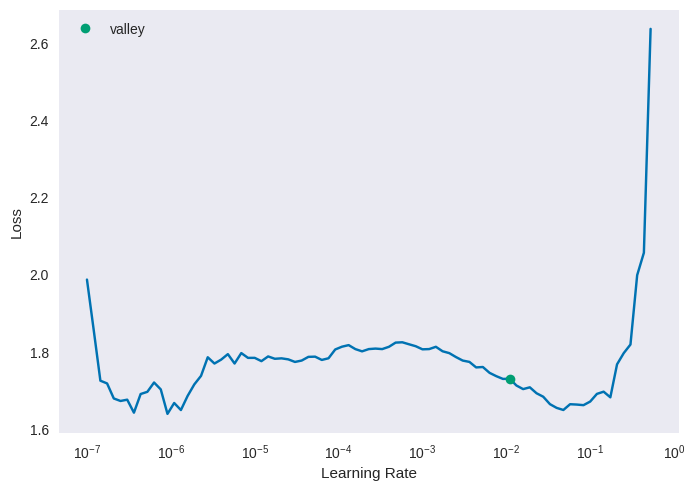

In [45]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate])

lr_min = learn.lr_find(show_plot=True)
print(f"Suggested Learning Rates: Min: {lr_min.valley}")

In [46]:
learn.fine_tune(20, base_lr=lr_min.valley, cbs=[SaveModelCallback(monitor='valid_loss', comp=np.less, fname='equivalent_bins_median_background_model'), EarlyStoppingCallback(monitor='valid_loss', patience=3)])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.506427,0.343968,0.890299,0.109701,01:15


Better model found at epoch 0 with valid_loss value: 0.3439677655696869.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.102330,0.035180,0.988385,0.011615,01:44
1,0.087259,0.063771,0.978275,0.021725,01:44
2,0.074555,0.053744,0.979781,0.020219,01:44
3,0.055394,0.067047,0.978490,0.021510,01:44


Better model found at epoch 0 with valid_loss value: 0.0351799800992012.
No improvement since epoch 0: early stopping


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:61: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


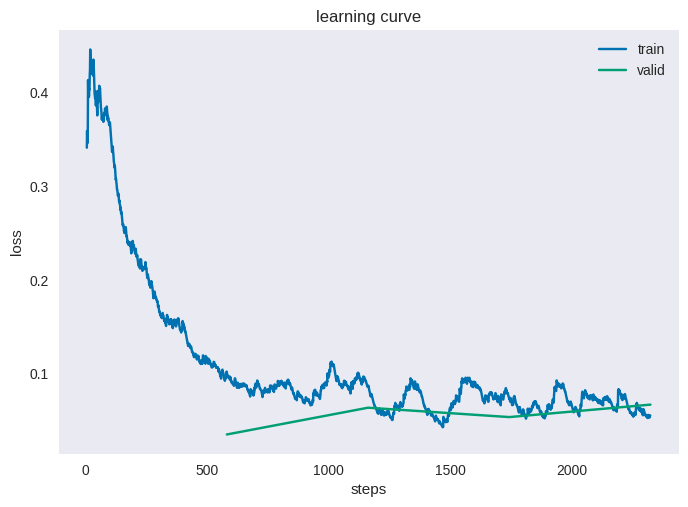

In [47]:
learn.recorder.plot_loss()
learn.load('equivalent_bins_median_background_model')

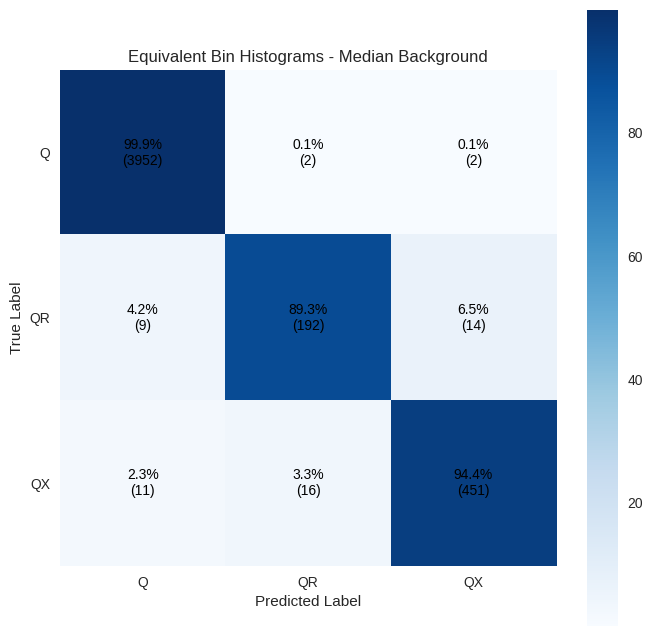

In [48]:
interp = ClassificationInterpretation.from_learner(learn)
cm = interp.confusion_matrix()
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots(figsize=(9, 8))
im = ax.imshow(cm_percent, cmap='Blues', interpolation='nearest')

# Add text annotations
for i in range(len(cm_percent)):
    for j in range(len(cm_percent[i])):
        text = f"{cm_percent[i, j]:.1f}%\n({int(cm[i, j])})"
        color = "white" if cm_percent[i, j] > 50 else "black"
        ax.text(j, i, text, ha="center", va="center", color=color)

ax.set_title("Equivalent Bin Histograms minus Median Background")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_xticks(range(len(interp.vocab)))
ax.set_yticks(range(len(interp.vocab)))
ax.set_xticklabels(interp.vocab)
ax.set_yticklabels(interp.vocab)
plt.colorbar(im, fraction=0.04)
plt.show()

In [49]:
preds, targets = learn.get_preds()
pred_classes = preds.argmax(dim=1)

# Generate the report
report = classification_report(targets, pred_classes, target_names=dls.vocab)
print(report)

              precision    recall  f1-score   support

           Q       0.99      1.00      1.00      3956
          QR       0.91      0.89      0.90       215
          QX       0.97      0.94      0.95       478

    accuracy                           0.99      4649
   macro avg       0.96      0.95      0.95      4649
weighted avg       0.99      0.99      0.99      4649



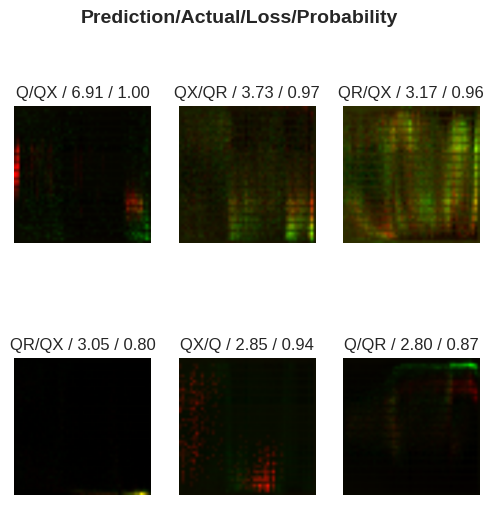

In [50]:
interp.plot_top_losses(k=6, figsize=(6, 6))  # Show 5 samples with largest loss

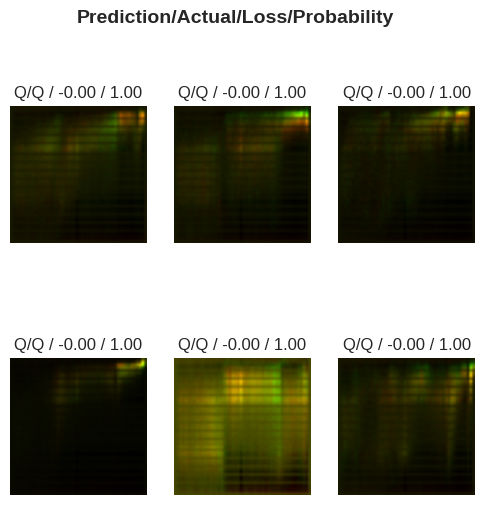

In [51]:
interp.plot_top_losses(k=6, figsize=(6, 6), largest=False)  # Show 5 samples with lowest loss

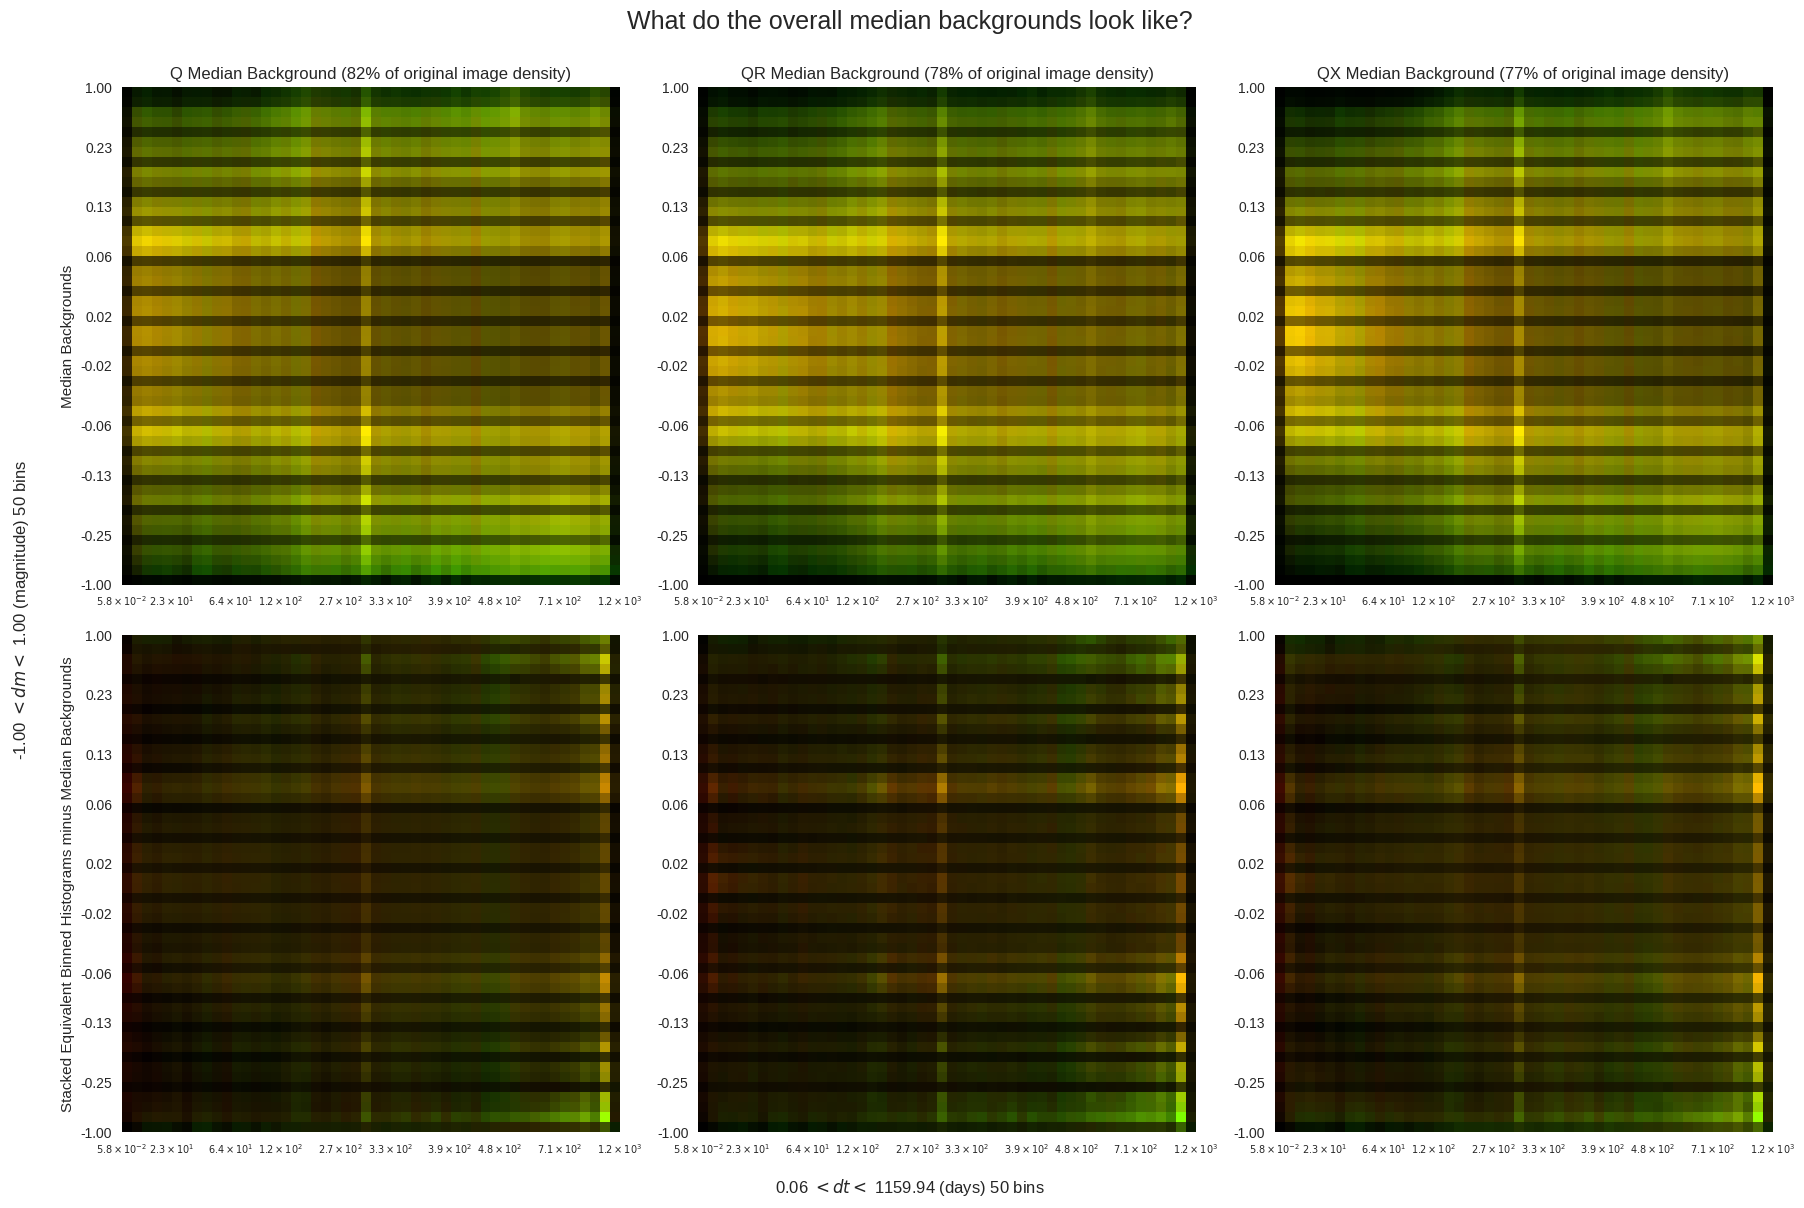

In [52]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

median_backgrounds = [Q_median_background, QR_median_background, QX_median_background]
total_densities = [background.sum() / 2 for background in median_backgrounds]
background_titles = [f'Q Median Background ({total_densities[0]:.0%} of original image density)',
                     f'QR Median Background ({total_densities[1]:.0%} of original image density)',
                     f'QX Median Background ({total_densities[2]:.0%} of original image density)']

for ax, median_background, title in zip(axs[0, :], median_backgrounds, background_titles):
    ax.imshow(numpy_to_pil(median_background), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Median Backgrounds')

histograms_median_subtracted = [norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram_minus_median_background'].sum()),
                                norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram_minus_median_background'].sum()),
                                norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram_minus_median_background'].sum())]

for ax, hist in zip(axs[1, :], histograms_median_subtracted):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Stacked Equivalent Binned Histograms minus Median Backgrounds')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('What do the overall median backgrounds look like?', size=18, y=1)

plt.tight_layout()

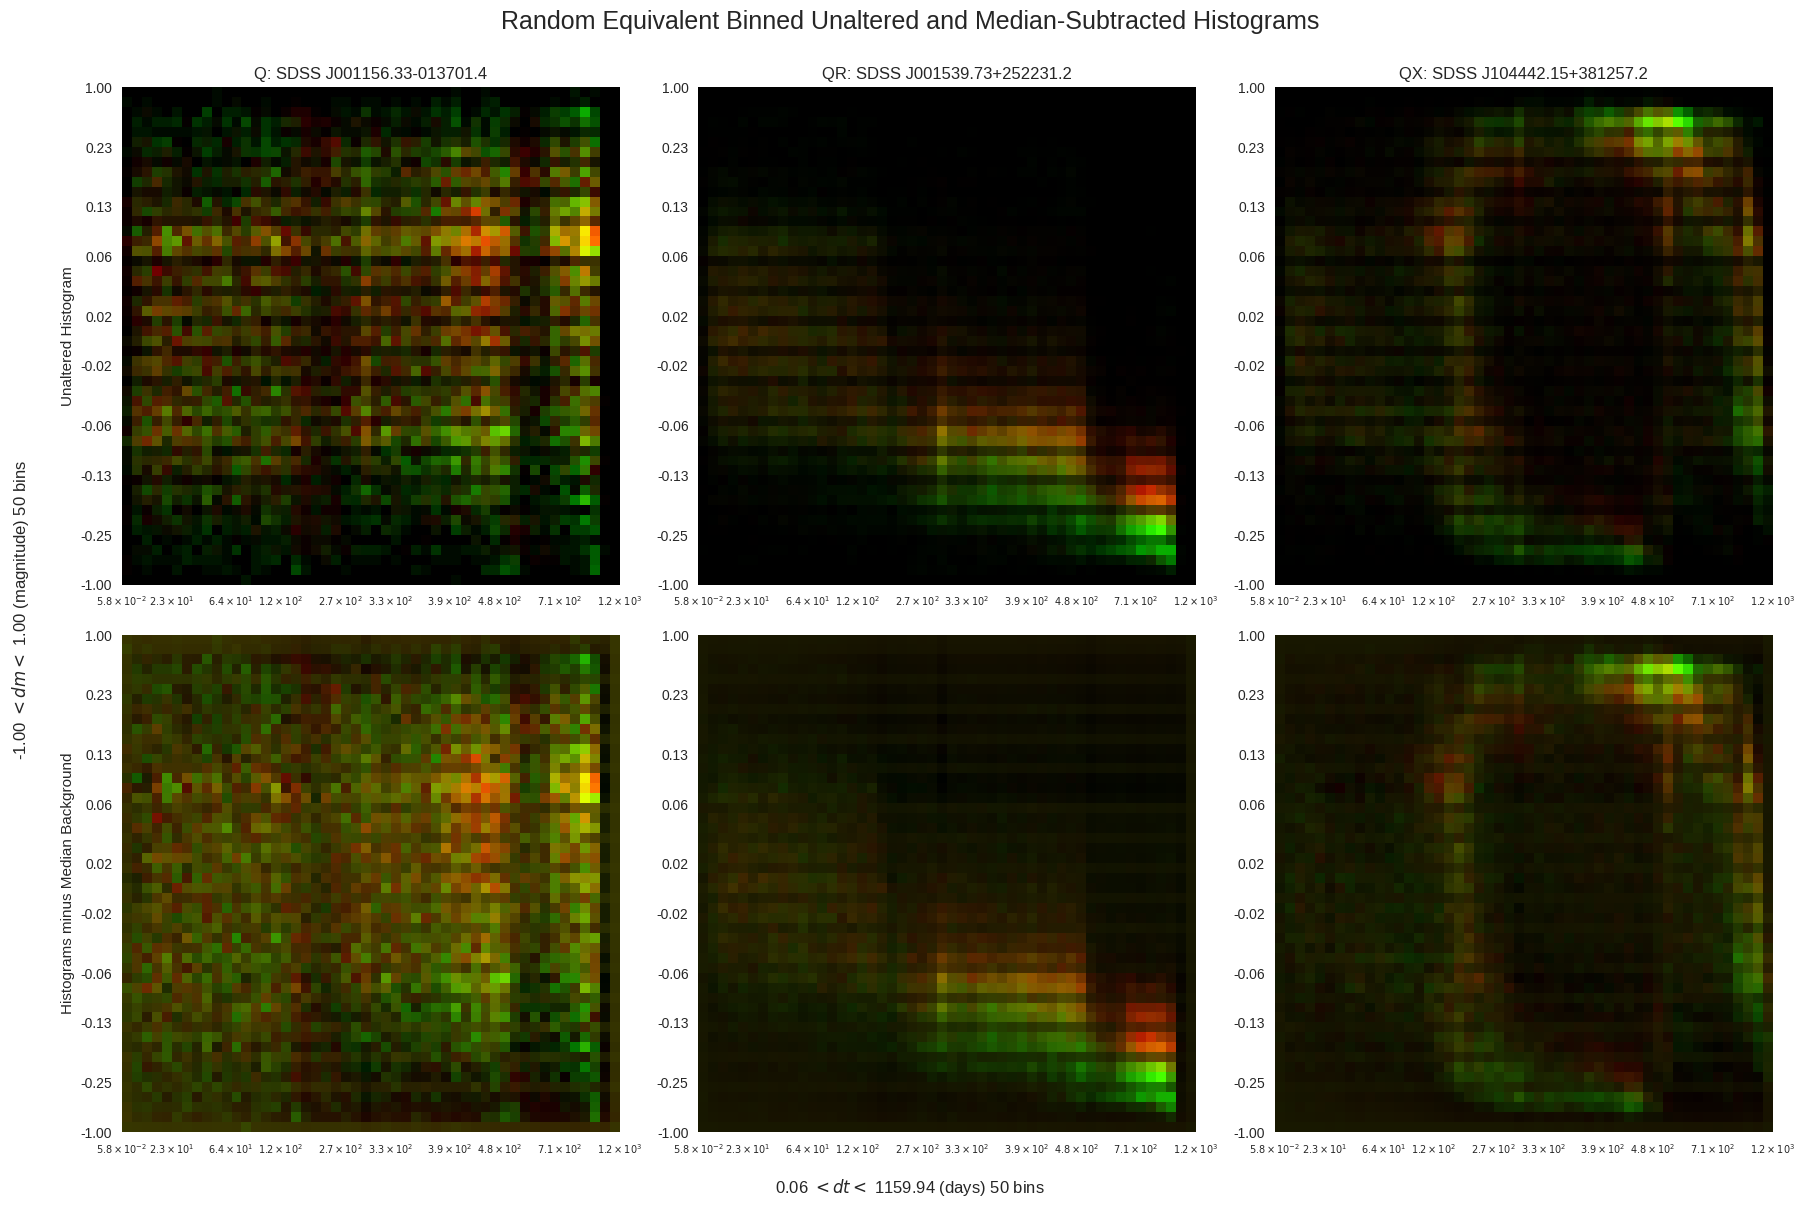

In [53]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


random_objects = [dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX'].sample(1)]
histograms = [obj['histogram'].iloc[0] for obj in random_objects]
median_subtracted_histograms = [obj['histogram_minus_median_background'].iloc[0] for obj in random_objects]

titles = [f"Q: {random_objects[0]['name'].iloc[0]}", f"QR: {random_objects[1]['name'].iloc[0]}", f"QX: {random_objects[2]['name'].iloc[0]}"]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))


for ax, hist, title in zip(axs[0, :], histograms, titles):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Unaltered Histogram')

for ax, hist in zip(axs[1, :], median_subtracted_histograms):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Histograms minus Median Background')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('Random Equivalent Binned Unaltered and Median-Subtracted Histograms', size=18, y=1)

plt.tight_layout()

# What are the distributions in background contribution?

In [54]:
dmdt_by_Name_Band = pd.read_pickle(dmdt_by_Name_Band_file)
dmdt_by_Name_Band = dmdt_by_Name_Band[dmdt_by_Name_Band['type'].isin(['Q', 'QR', 'QX'])]
dmdt_by_Name_Band = dmdt_by_Name_Band[dmdt_by_Name_Band['band'] == 'rg']

In [55]:
def get_FBPA_LS_histograms(histogram_list):
    r_histograms = np.array([arr[:, :, 0] for arr in histogram_list])
    g_histograms = np.array([arr[:, :, 1] for arr in histogram_list])

    M_r = np.stack([arr.flatten() for arr in r_histograms], axis=1)
    M_g = np.stack([arr.flatten() for arr in g_histograms], axis=1)

    L_r, S_r, examples =  pcp(M_r, maxiter=7, k=10, example_column=1000)
    L_g, S_g, examples =  pcp(M_g, maxiter=7, k=10, example_column=1000)

    L_array = []
    S_array = []
    for i in range(len(M_r[0, :])):
        L_histogram = np.zeros_like(histogram_list[0])
        S_histogram = np.zeros_like(histogram_list[0])

        L_r_histogram, L_g_histogram = L_r[:, i].reshape(histogram_list[0][:, :, 0].shape), L_g[:, i].reshape(histogram_list[0][:, :, 0].shape)
        S_r_histogram, S_g_histogram = S_r[:, i].reshape(histogram_list[0][:, :, 0].shape), S_g[:, i].reshape(histogram_list[0][:, :, 0].shape)

        L_histogram[:, :, 0] = L_r_histogram
        L_histogram[:, :, 1] = L_g_histogram
        S_histogram[:, :, 0] = S_r_histogram
        S_histogram[:, :, 1] = S_g_histogram

        L_array.append(L_histogram)
        S_array.append(S_histogram)

    return L_array, S_array

In [56]:
dmdt_by_Name_Band_Q = dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q'].copy()
dmdt_by_Name_Band_QR = dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR'].copy()
dmdt_by_Name_Band_QX = dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX'].copy()

del dmdt_by_Name_Band

In [57]:
for df in [dmdt_by_Name_Band_Q, dmdt_by_Name_Band_QR, dmdt_by_Name_Band_QX]:
    L_array, S_array = get_FBPA_LS_histograms(df['histogram'].to_numpy())
    df['L'] = L_array
    df['S'] = S_array

rank sv: 1
error:  0.5244019876419825
rank sv: 126
error:  0.0733827530210311
rank sv: 92
error:  0.0048480844795942245
rank sv: 217
error:  0.00012784618014501266
rank sv: 175
error:  3.162877574233474e-06
rank sv: 174
error:  1.1990462762640258e-07
rank sv: 174
error:  4.675529390996856e-09
rank sv: 1
error:  0.5119369664104592
rank sv: 126
error:  0.08110582300613416
rank sv: 83
error:  0.005086673970246727
rank sv: 208
error:  0.00012272769648125943
rank sv: 175
error:  3.1959321492782065e-06
rank sv: 300
error:  1.3661384614769142e-07
rank sv: 224
error:  8.229735636900616e-09
rank sv: 1
error:  0.4524348811621903
rank sv: 65
error:  0.053629813935167255
rank sv: 61
error:  0.0026669130446662728
rank sv: 125
error:  7.587624961068984e-05
rank sv: 189
error:  2.077639671065101e-06
rank sv: 166
error:  9.237925054298433e-08
rank sv: 166
error:  5.802128676974138e-09
rank sv: 1
error:  0.45790001563069627
rank sv: 65
error:  0.059160614338961054
rank sv: 60
error:  0.0027594635401766

In [58]:
dmdt_by_Name_Band = pd.concat([dmdt_by_Name_Band_Q, dmdt_by_Name_Band_QR, dmdt_by_Name_Band_QX], axis=0, ignore_index=True)

In [59]:
dmdt_by_Name_Band.to_pickle(dmdt_by_Name_Band_file.split('.')[0] + '_LS.pkl')

In [60]:
def get_FBPA_MLS(histogram_list):
    r_histograms = np.array([arr[:, :, 0] for arr in histogram_list])
    g_histograms = np.array([arr[:, :, 1] for arr in histogram_list])

    M_r = np.stack([arr.flatten() for arr in r_histograms], axis=1)
    M_g = np.stack([arr.flatten() for arr in g_histograms], axis=1)

    L_r, S_r, examples =  pcp(M_r, maxiter=7, k=10, example_column=1000)
    L_g, S_g, examples =  pcp(M_g, maxiter=7, k=10, example_column=1000)

    return M_r, L_r, S_r, M_g, L_g, S_g

def get_background_contribution(M, L, S):
    L_ratio_list = np.array([L[:, i].sum() / M[:, i].sum() for i in range(len(L[0, :]))])
    S_ratio_list = np.array([S[:, i].sum() / M[:, i].sum() for i in range(len(L[0, :]))])
    return L_ratio_list, S_ratio_list

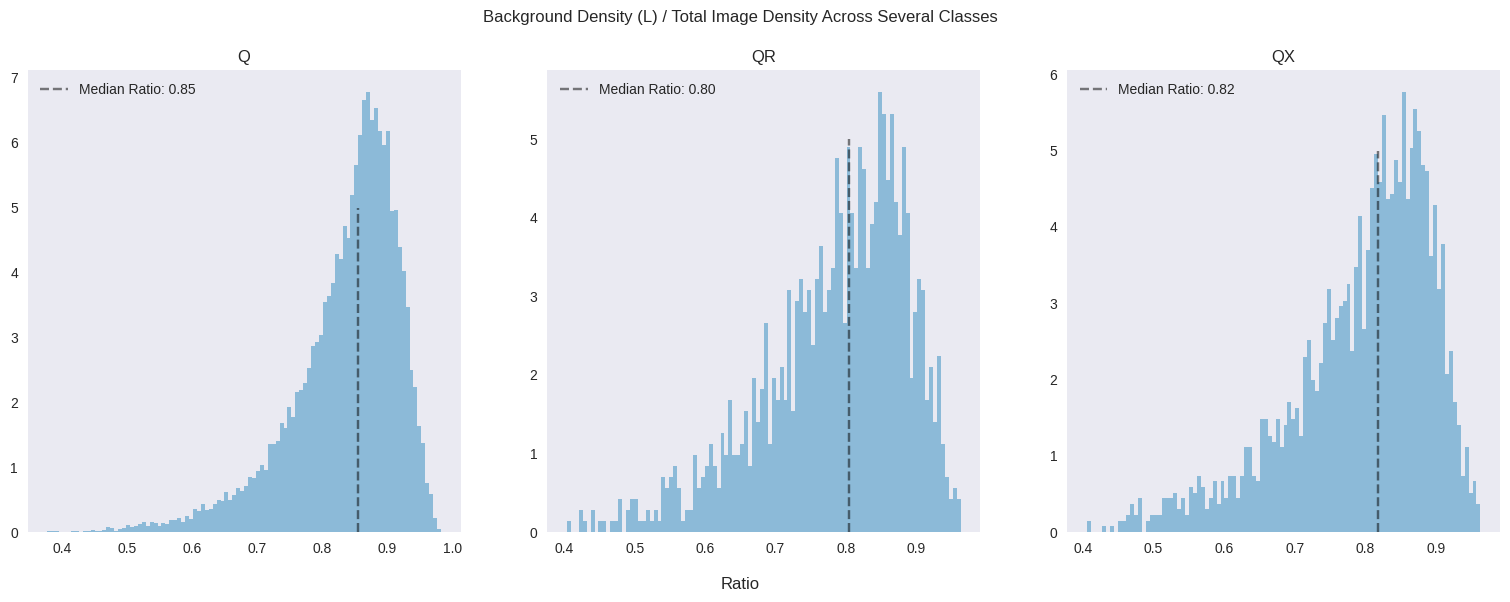

In [61]:
object_types = ['Q', 'QR', 'QX']
nbins = 100
alpha = 0.4

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(19, 6))

for ax, object_type in zip(axs, object_types):
    df = dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == object_type]
    histogram_density_array = df['histogram'].apply(np.sum).to_numpy()
    L_density_array = df['L'].apply(np.sum).to_numpy()
    ratio_array = L_density_array / histogram_density_array

    median = np.median(ratio_array)
    ax.vlines(median, ymin=0, ymax=5, colors='black', linestyles='--', alpha=0.5, label=f'Median Ratio: {median:.2f}')

    ax.hist(ratio_array, bins=nbins, alpha=alpha, density=True)
    ax.set_title(object_type)
    # ax.set_xlim(0, 2)

fig.suptitle('Background Density (L) / Total Image Density Across Several Classes')
fig.supxlabel('Cont Density')
fig.supxlabel('Ratio')

for ax in axs:
    ax.legend()

plt.show()